# RQ1 How many higher education institutions are found in counties with majority underrepresented groups?

## Wat are the characteristics of those institutions?

In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

import us

import matplotlib.pyplot as plt

from datetime import datetime as dt
today = dt.today().strftime("%d-%b-%y")
from pathlib import Path
from tools import tree

today

'05-Jul-20'

In [ ]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/intermin/")
PROCESSED_DATA = Path("../data/processed/")
FINAL_DATA = Path("../data/final/")
EXTERNAL_DATA = Path("../data/external/")

In [3]:
tree(PROCESSED_DATA)

+ ../data/processed
    + counties.csv
    + geodata
        + tl_2019_us_county.cpg
        + tl_2019_us_county.dbf
        + tl_2019_us_county.prj
        + tl_2019_us_county.shp
        + tl_2019_us_county.shp.ea.iso.xml
        + tl_2019_us_county.shp.iso.xml
        + tl_2019_us_county.shx
    + institutions_data.csv
    + processed_data.csv


In [7]:
counties_df = pd.read_csv(PROCESSED_DATA/'counties.csv')
institutions_df = pd.read_csv(PROCESSED_DATA/'institutions_data.csv')
counties_shapes = gpd.read_file(PROCESSED_DATA/'geodata/tl_2019_us_county.shp')

In [8]:
counties_shapes.head(3)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."


In [9]:
counties_df.head()

,geoid,name,universe,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,state,county,asians_all,other_all
0,1001,"Autauga County, Alabama",55200.0,41412.0,10475.0,159.0,568.0,5.0,41.0,1012.0,1528.0,1,1,573.0,1212.0
1,1003,"Baldwin County, Alabama",208107.0,172768.0,19529.0,1398.0,1668.0,9.0,410.0,2972.0,9353.0,1,3,1677.0,4780.0
2,1005,"Barbour County, Alabama",25782.0,11898.0,12199.0,63.0,85.0,1.0,86.0,344.0,1106.0,1,5,86.0,493.0
3,1007,"Bibb County, Alabama",22527.0,16801.0,4974.0,8.0,37.0,0.0,0.0,160.0,547.0,1,7,37.0,168.0
4,1009,"Blount County, Alabama",57645.0,50232.0,820.0,124.0,198.0,18.0,174.0,818.0,5261.0,1,9,216.0,1116.0


In [10]:
institutions_df.head()

,institution_name,fips_state_code,longitude,latitude,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,Montana,-108.757816,48.484196,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,Texas,-99.709797,32.468943,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,Georgia,-83.528281,31.481889,4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,California,-118.256726,34.146294,217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,Minnesota,-93.299809,44.855722,99.0,81.0,18.0,Private for-profit,4-year or above


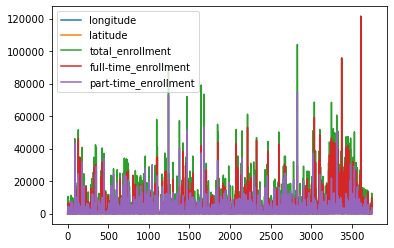

In [11]:
institutions_df.plot()

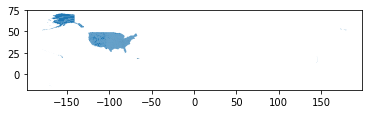

In [18]:
counties_shapes.plot();

In [19]:
counties_shapes.head().T

,0,1,2,3,4
STATEFP,31,53,35,31,31
COUNTYFP,039,069,011,109,129
COUNTYNS,00835841,01513275,00933054,00835876,00835886
GEOID,31039,53069,35011,31109,31129
NAME,Cuming,Wahkiakum,De Baca,Lancaster,Nuckolls
NAMELSAD,Cuming County,Wahkiakum County,De Baca County,Lancaster County,Nuckolls County
LSAD,06,06,06,06,06
CLASSFP,H1,H1,H1,H1,H1
MTFCC,G4020,G4020,G4020,G4020,G4020
CSAFP,None,None,None,339,None


In [21]:
us.STATES

[<State:Alabama>,
 <State:Alaska>,
 <State:Arizona>,
 <State:Arkansas>,
 <State:California>,
 <State:Colorado>,
 <State:Connecticut>,
 <State:Delaware>,
 <State:Florida>,
 <State:Georgia>,
 <State:Hawaii>,
 <State:Idaho>,
 <State:Illinois>,
 <State:Indiana>,
 <State:Iowa>,
 <State:Kansas>,
 <State:Kentucky>,
 <State:Louisiana>,
 <State:Maine>,
 <State:Maryland>,
 <State:Massachusetts>,
 <State:Michigan>,
 <State:Minnesota>,
 <State:Mississippi>,
 <State:Missouri>,
 <State:Montana>,
 <State:Nebraska>,
 <State:Nevada>,
 <State:New Hampshire>,
 <State:New Jersey>,
 <State:New Mexico>,
 <State:New York>,
 <State:North Carolina>,
 <State:North Dakota>,
 <State:Ohio>,
 <State:Oklahoma>,
 <State:Oregon>,
 <State:Pennsylvania>,
 <State:Rhode Island>,
 <State:South Carolina>,
 <State:South Dakota>,
 <State:Tennessee>,
 <State:Texas>,
 <State:Utah>,
 <State:Vermont>,
 <State:Virginia>,
 <State:Washington>,
 <State:West Virginia>,
 <State:Wisconsin>,
 <State:Wyoming>]

In [17]:
import us
us.STATES_CONTIGUOUS[0].name
us.STATES_CONTIGUOUS[0].fips
us.STATES_CONTIGUOUS[0].abbr

'Alabama'

'01'

'AL'

In [20]:
contiguous_fips = [state.fips for state in us.STATES_CONTIGUOUS]
contiguous_fips[:5]

['01', '04', '05', '06', '08']

In [26]:
mask = counties_shapes['STATEFP'].isin(contiguous_fips)

In [28]:
counties_shapes = counties_shapes[mask]

In [29]:
institutions_df.head()

,institution_name,fips_state_code,longitude,latitude,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,Montana,-108.757816,48.484196,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,Texas,-99.709797,32.468943,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,Georgia,-83.528281,31.481889,4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,California,-118.256726,34.146294,217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,Minnesota,-93.299809,44.855722,99.0,81.0,18.0,Private for-profit,4-year or above


In [41]:
contiguous_names = [state.name for state in us.STATES_CONTIGUOUS]
mask = institutions_df.fips_state_code.isin(contiguous_names)

In [43]:
institutions_df[mask]= institutions_df

In [46]:
#alternatively:
name_to_fips_map = us.states.mapping('name','fips')
name_to_fips_map
#and then use fips codes again per the above

{'Alabama': '01',
 'Alaska': '02',
 'Arizona': '04',
 'Arkansas': '05',
 'California': '06',
 'Colorado': '08',
 'Connecticut': '09',
 'Delaware': '10',
 'Florida': '12',
 'Georgia': '13',
 'Hawaii': '15',
 'Idaho': '16',
 'Illinois': '17',
 'Indiana': '18',
 'Iowa': '19',
 'Kansas': '20',
 'Kentucky': '21',
 'Louisiana': '22',
 'Maine': '23',
 'Maryland': '24',
 'Massachusetts': '25',
 'Michigan': '26',
 'Minnesota': '27',
 'Mississippi': '28',
 'Missouri': '29',
 'Montana': '30',
 'Nebraska': '31',
 'Nevada': '32',
 'New Hampshire': '33',
 'New Jersey': '34',
 'New Mexico': '35',
 'New York': '36',
 'North Carolina': '37',
 'North Dakota': '38',
 'Ohio': '39',
 'Oklahoma': '40',
 'Oregon': '41',
 'Pennsylvania': '42',
 'Rhode Island': '44',
 'South Carolina': '45',
 'South Dakota': '46',
 'Tennessee': '47',
 'Texas': '48',
 'Utah': '49',
 'Vermont': '50',
 'Virginia': '51',
 'Washington': '53',
 'West Virginia': '54',
 'Wisconsin': '55',
 'Wyoming': '56',
 'American Samoa': '60',
 'G

In [52]:
institutions_df['fips_state_code'].map(name_to_fips_map)

0       30
1       48
2       13
3       06
4       27
        ..
3746    39
3747    42
3748    42
3749    06
3750    39
Name: fips_state_code, Length: 3751, dtype: object

# Checkpoint

In [ ]:
# sergio substituted the codes in for the names but I'd rather keep state names
